In [1]:
import sklearn
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics.pairwise import rbf_kernel, pairwise_kernels
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

import pandas as pd
import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
import random
import math

!pip install emcee
import emcee

!pip install corner
import corner

!pip install dynesty
import dynesty
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc

C:\Users\giuli\anaconda3\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


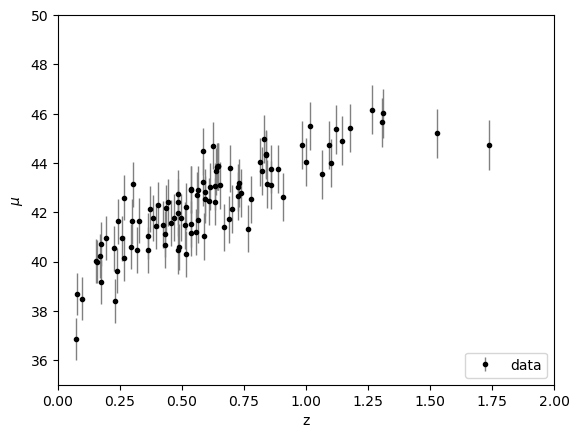

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) ###YOU CAN'T CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

In [3]:
'''
kernel = [kernels.RBF((1e-6,1e6)),kernels.DotProduct((1e-6,1e6)),kernels.Product(kernels.RBF((1e-6,1e6)),kernels.DotProduct((1e-6,1e6)))]
model = GaussianProcessRegressor()
grid = GridSearchCV(model, {'kernel': kernel}, scoring = 'r2', cv= 5)
grid.fit(z_sample[:,np.newaxis],mu_sample)
print('Best iperparameter: ', grid.best_params_)
print('Best score: ', grid.best_score_)
'''

"\nkernel = [kernels.RBF((1e-6,1e6)),kernels.DotProduct((1e-6,1e6)),kernels.Product(kernels.RBF((1e-6,1e6)),kernels.DotProduct((1e-6,1e6)))]\nmodel = GaussianProcessRegressor()\ngrid = GridSearchCV(model, {'kernel': kernel}, scoring = 'r2', cv= 5)\ngrid.fit(z_sample[:,np.newaxis],mu_sample)\nprint('Best iperparameter: ', grid.best_params_)\nprint('Best score: ', grid.best_score_)\n"

In [1]:
# switch off optimization to cross validate

In [30]:
n_splits = 5
kf = KFold(n_splits=n_splits,shuffle=True)
split = kf.split(z_sample)

model = GaussianProcessRegressor(kernels.RBF())

accur = []
for i, (train_index, test_index) in zip(range(n_splits),split):
    X_train = z_sample[train_index]
    y_train = mu_sample[train_index]
    err_train = dmu[train_index] 
    
    X_test = z_sample[test_index]
    y_test = mu_sample[test_index]
    err_test = dmu[test_index]
    
    model.fit(X_train[:,np.newaxis], y_train)

    acc = model.score(X_test[:,np.newaxis],y_test)
    print(f"Fold {i}: accuracy on the validation set ", acc)
    accur.append(acc)

print('Average accuracy = ', np.sum(np.array(accur))/len(accur))

Fold 0: accuracy on the validation set  -508.24347986884965
Fold 1: accuracy on the validation set  -585.6902060524936
Fold 2: accuracy on the validation set  -707.039765489737
Fold 3: accuracy on the validation set  -427.46311341892164
Fold 4: accuracy on the validation set  -792.815565013708
Average accuracy =  -604.2504259687419


C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarni

In [4]:
n_splits = 5
kf = KFold(n_splits=n_splits,shuffle=True)
split = kf.split(z_sample)

model = GaussianProcessRegressor(kernels.DotProduct())

accur = []
for i, (train_index, test_index) in zip(range(n_splits),split):
    X_train = z_sample[train_index]
    y_train = mu_sample[train_index]
    err_train = dmu[train_index] 
    
    X_test = z_sample[test_index]
    y_test = mu_sample[test_index]
    err_test = dmu[test_index]
    
    model.fit(X_train[:,np.newaxis], y_train)

    acc = model.score(X_test[:,np.newaxis],y_test)
    print(f"Fold {i}: accuracy on the validation set ", acc)
    accur.append(acc)

print('Average accuracy = ', np.sum(np.array(accur))/len(accur))

Fold 0: accuracy on the validation set  0.5881504131627338
Fold 1: accuracy on the validation set  0.7073216171859043
Fold 2: accuracy on the validation set  0.6027731438862085
Fold 3: accuracy on the validation set  0.7213938200093988
Fold 4: accuracy on the validation set  0.786830709732417
Average accuracy =  0.6812939407953325


C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [5]:
n_splits = 5
kf = KFold(n_splits=n_splits,shuffle=True)
split = kf.split(z_sample)

model = GaussianProcessRegressor(kernels.Product(kernels.RBF(),kernels.DotProduct()))

accur = []
for i, (train_index, test_index) in zip(range(n_splits),split):
    X_train = z_sample[train_index]
    y_train = mu_sample[train_index]
    err_train = dmu[train_index] 
    
    X_test = z_sample[test_index]
    y_test = mu_sample[test_index]
    err_test = dmu[test_index]
    
    model.fit(X_train[:,np.newaxis], y_train)

    acc = model.score(X_test[:,np.newaxis],y_test)
    print(f"Fold {i}: accuracy on the validation set ", acc)
    accur.append(acc)

print('Average accuracy = ', np.sum(np.array(accur))/len(accur))

Fold 0: accuracy on the validation set  -412.9924135275783
Fold 1: accuracy on the validation set  -473.48384982831385
Fold 2: accuracy on the validation set  -294.88800112777426
Fold 3: accuracy on the validation set  -632.003597575487
Fold 4: accuracy on the validation set  -550.6924333300458
Average accuracy =  -472.8120590778399


In [6]:
'''
rand = np.random.randint(0,np.size(z_sample),10)
x1= z_sample[rand]
y1= mu_sample[rand]
dmu1 = dmu[rand]
'''

gp = GaussianProcessRegressor(kernel = kernels.Product(kernels.RBF(),kernels.DotProduct()),alpha = dmu**2)
gp.fit(z_sample[:,np.newaxis], mu_sample)
y_pred, std_prediction = gp.predict(z_sample[:, np.newaxis], return_std=True)

In [7]:
#sort data to plot it
x, y, err = zip(*sorted(zip(z_sample,y_pred,std_prediction)))
x = np.array(x)
y = np.array(y)
err = np.array(err)

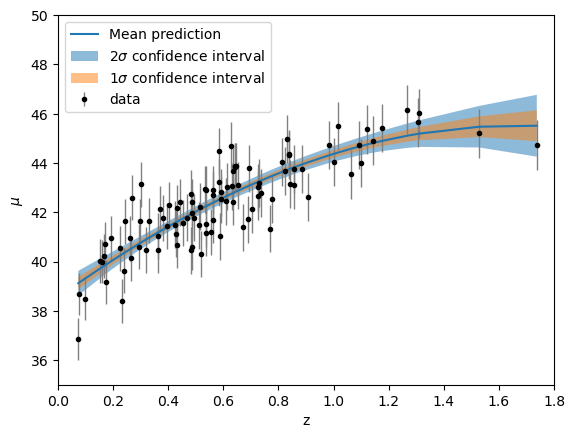

In [8]:
#plt.scatter(x1, y1, label="Observations")

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,1.8)
plt.ylim(35,50);

plt.plot(x, y, label="Mean prediction")
plt.fill_between(x, y - 2 * err, y + 2 * err, alpha=0.5, label=r"2$\sigma$ confidence interval")
plt.fill_between(x, y - err, y + err, alpha=0.5, label=r"1$\sigma$ confidence interval")
plt.legend()
plt.show()

# resample

We resample our dataset using inverse transform sampling.

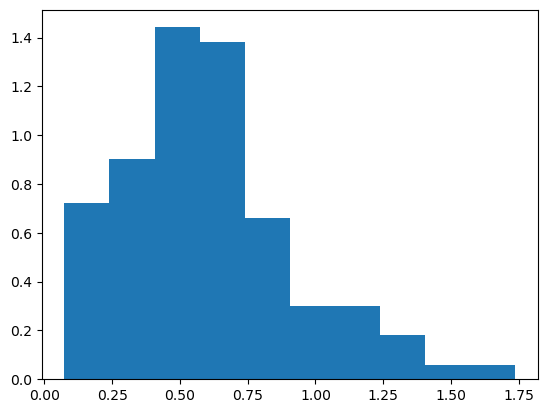

In [9]:
a,b,c = plt.hist(z_sample,density=True)

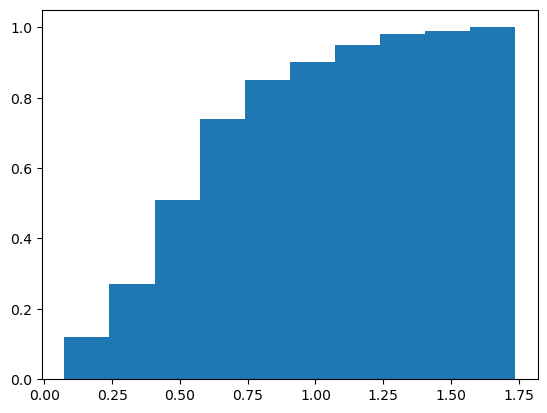

In [10]:
a1,b1,c1 = plt.hist(z_sample,density=True,cumulative=True)

In [11]:
u = np.random.uniform(0,1,1000)
index_u = np.searchsorted(a1,u)
sample_new = np.random.uniform(b1[index_u],b1[index_u+1])

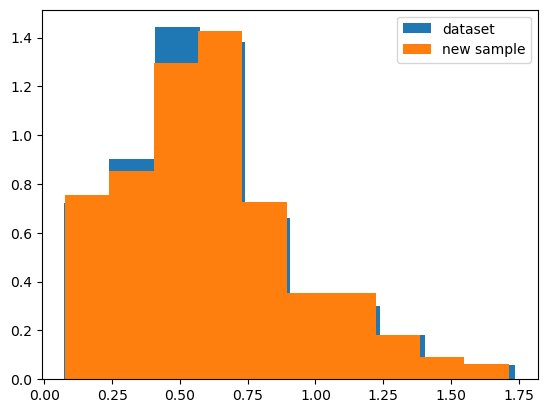

In [12]:
a0,b0,c0 = plt.hist(z_sample,density=True,label='dataset')
a1,b1,c1=plt.hist(sample_new,density=True,label='new sample')
plt.legend()
plt.show()

In [2]:
# new sample: the model gives us mu and sigma! generate the new sample as a random point drawn from a gaussian with mu and sigma

In [13]:
y_pred, std_prediction = gp.predict(sample_new[:, np.newaxis], return_std=True)

In [14]:
#sort data to plot it
x, y, err = zip(*sorted(zip(sample_new,y_pred,std_prediction)))
x = np.array(x)
y = np.array(y)
err = np.array(err)

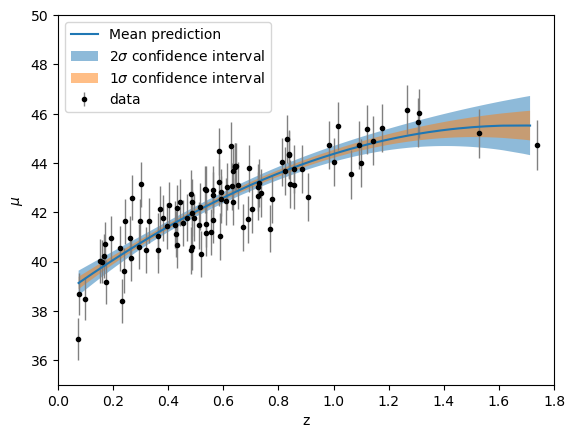

In [15]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,1.8)
plt.ylim(35,50);

plt.plot(x, y, label="Mean prediction")
plt.fill_between(x, y - 2 * err, y + 2 * err, alpha=0.5, label=r"2$\sigma$ confidence interval")
plt.fill_between(x, y - err, y + err, alpha=0.5, label=r"1$\sigma$ confidence interval")
plt.legend()
plt.show()

# $\Lambda$CDM

In [16]:
def integral(x,a):
    return 1/np.sqrt(a*(1+x**3)+1-a)  # function to integrate

def integ(z,omega_m):
    i = []
    for z in z:
        x = z*np.random.rand(1000)       # I generate random numbers in a box: x in [0,z], since I am evualuating the integral in this interval
        y = np.random.rand(1000)         # y in [0,1], possible values for the function f to integrate
        x_ok = x[y<=integral(x,omega_m)] # I keep only those values such that y<f(x)
        y_ok = y[y<=integral(x,omega_m)]

        # (number of generated couples) / (number of ok couples) = (area of the box) / (integral)
        i.append((np.max(x)-np.min(x))*(np.max(y)-np.min(y))*np.size(x_ok)/np.size(x))
    
    return np.array(i)

def mu(z,H0,omega_m):
    return 5*np.log10(3*10**5/H0/10**(-5)*(1+z)*integ(z,omega_m))

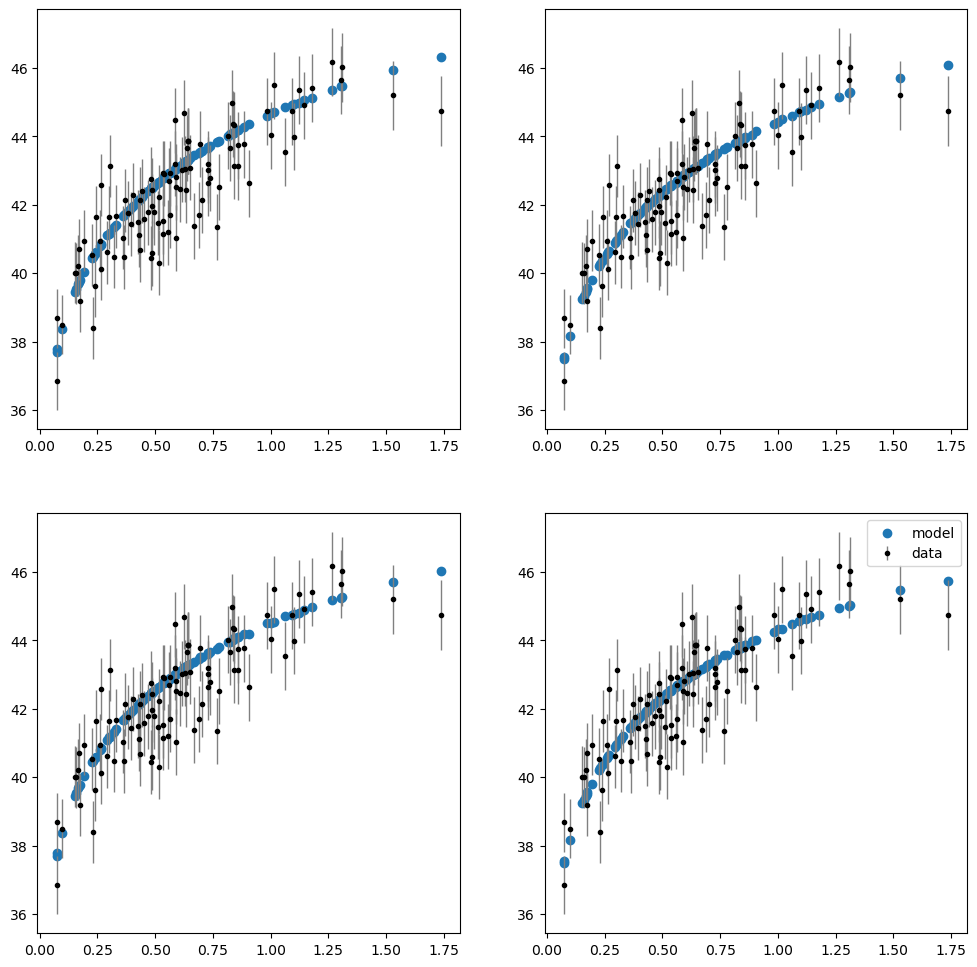

In [17]:
fig,axes = plt.subplots(2,2,figsize=(12,12))

axes[0,0].scatter(z_sample,mu(z_sample,68,0.3),label='model')
axes[0,0].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

axes[0,1].scatter(z_sample,mu(z_sample,75,0.3),label='model')
axes[0,1].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

axes[1,0].scatter(z_sample,mu(z_sample,68,1),label='model')
axes[1,0].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

axes[1,1].scatter(z_sample,mu(z_sample,75,1),label='model')
axes[1,1].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

plt.legend()
plt.show()

To fit the model to the data we use nested sampling.

## Model 1: $\Omega_m$ and $\Omega_{\Lambda}$

In [18]:
# p = [H0, omega_m]

def model_1(p,x):
    return mu(x,p[0],p[1])
    
def prior_1(p):
    prior_H = (80-60)*p[0]+60  # uniform [50,100]
    prior_omega = p[1]         # uniform [0,1]
    return [prior_H,prior_omega]

def log_likelihood_1(p,x,y,yerr):  #likelihood = prod(exp(-(y-model**2)/sigma**2)/(2*pi*sigma**2))
    return -0.5*np.sum((y-model_1(p,x))**2/yerr**2+np.log(2*np.pi*yerr**2))

In [19]:
ndim = 2
sampler_1 = dynesty.NestedSampler(log_likelihood_1, prior_1, ndim=ndim, logl_args=[z_sample,mu_sample,dmu])
sampler_1.run_nested()
sresults_1 = sampler_1.results

1250it [01:16, 16.28it/s, +500 | bound: 0 | nc: 1 | ncall: 6975 | eff(%): 27.027 | loglstar:   -inf < -133.505 <    inf | logz: -135.199 +/-  0.020 | dlogz:  0.001 >  0.509]


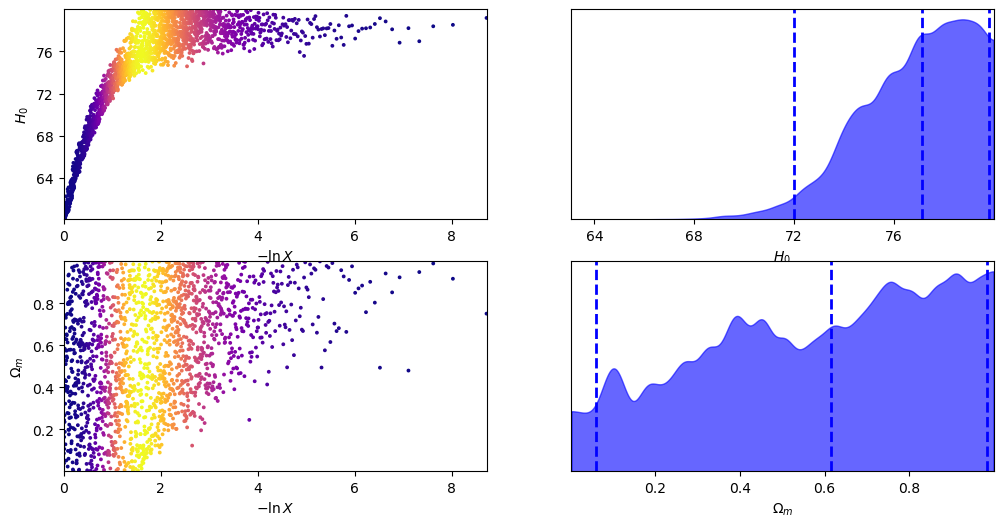

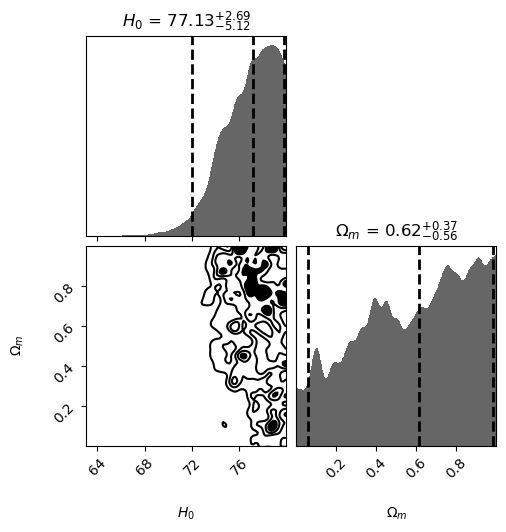

In [20]:
labels = [r"$H_0$",r"$\Omega_m$"]
tfig, taxes = dyplot.traceplot(sresults_1,labels=labels)
cfig, caxes = dyplot.cornerplot(sresults_1,show_titles=True, labels=labels)

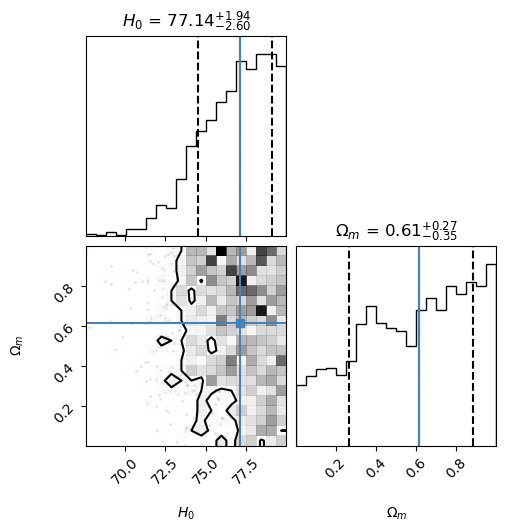

In [21]:
weights = np.exp(sresults_1.logwt - sresults_1.logz[-1])
samples = sresults_1.samples
samples_equal_1 = dyfunc.resample_equal(samples, weights) #Resample weighted samples
medians_1 = np.median(samples_equal_1,0)

fig = corner.corner(samples_equal_1, levels=[0.9],labels=labels,
                    truths=medians_1,show_titles=True,quantiles=[0.16,0.5,0.84])

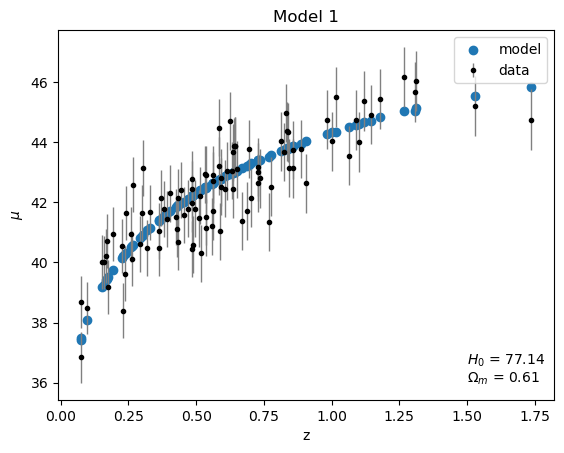

In [22]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_sample,mu(z_sample,medians_1[0],medians_1[1]),label='model')
plt.legend()
plt.text(1.5,36,r"$H_0$ = "+str(np.round(medians_1[0],2))+'\n'+r"$\Omega_m$ = "+str(np.round(medians_1[1],2)))
plt.title('Model 1')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.show()

## Model 2: $\Omega_m$ only

In [23]:
# p = [H0]

def model_2(p,x):
    return mu(x,p[0],1)
    
def prior_2(p):
    prior_H = (80-60)*p[0]+60  # uniform [50,100]
    return [prior_H]

def log_likelihood_2(p,x,y,yerr):  #likelihood = prod(exp(-(y-model**2)/sigma**2)/(2*pi*sigma**2))
    return -0.5*np.sum((y-model_2(p,x))**2/yerr**2+np.log(2*np.pi*yerr**2))

In [24]:
ndim = 1
sampler_2 = dynesty.NestedSampler(log_likelihood_2, prior_2, ndim=ndim, logl_args=[z_sample,mu_sample,dmu])
sampler_2.run_nested()
sresults_2 = sampler_2.results

1201it [01:06, 18.02it/s, +500 | bound: 0 | nc: 1 | ncall: 6005 | eff(%): 30.899 | loglstar:   -inf < -133.386 <    inf | logz: -134.995 +/-  0.007 | dlogz:  0.001 >  0.509]


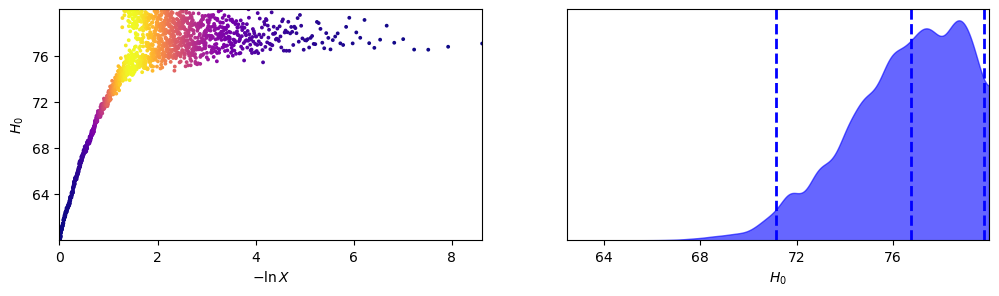

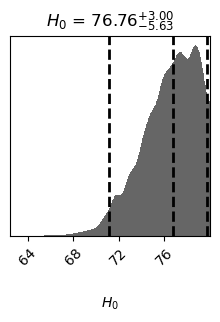

In [25]:
labels = [r"$H_0$"]
tfig, taxes = dyplot.traceplot(sresults_2,labels=labels)
cfig, caxes = dyplot.cornerplot(sresults_2,show_titles=True, labels=labels)

In [26]:
weights = np.exp(sresults_2.logwt - sresults_2.logz[-1])
samples = sresults_2.samples
samples_equal_2 = dyfunc.resample_equal(samples, weights) #Resample weighted samples
medians_2 = np.median(samples_equal_2,0)

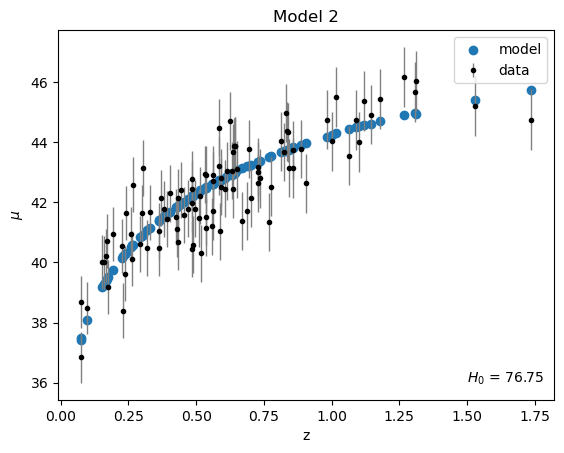

In [27]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_sample,mu(z_sample,medians_1[0],1),label='model')
plt.legend()
plt.text(1.5,36,r"$H_0$ = "+str(np.round(medians_2[0],2)))
plt.title('Model 2')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.show()

## Comparison: Bayesian ratio

In [28]:
# Ha senso??? Ho gli stessi prior????

In [29]:
b = np.exp(sresults_2.logz[-1])/np.exp(sresults_1.logz[-1])
print('Bayes factor = ', b)
if b<1:
    print('The first model is preferred')
else:
    print('The second model is preferred')

Bayes factor =  1.2258125050269473
The second model is preferred
